In [2]:
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import pickle

# use pytorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# 3.1

In [15]:
# read files 0.txt to 9.txt in each language
lang_labels = ['e', 'j', 's']
lang_data = {label: {} for label in lang_labels}

for lang_label in lang_labels:
    for i in range(10):
        file_name = 'languageID/' + lang_label + str(i) + '.txt'
        with open(file_name, 'r') as f:
            text = f.read()
            # remove \n
            text = text.replace('\n', '')
            lang_data[lang_label][str(i)] = text
            
# estimate prior probability
prior_prob = {lang_label: (len(lang_data[lang_label]) + 0.5)/ (30 + 0.5 * 3) for lang_label in lang_labels}
log_prior_prob = {lang_label: np.log(prior_prob[lang_label]) for lang_label in lang_labels}
for lang_label in lang_labels:
    print('prior probability of', lang_label, '=', prior_prob[lang_label])
    print('log prior probability of', lang_label, '=', log_prior_prob[lang_label])

prior probability of e = 0.3333333333333333
log prior probability of e = -1.0986122886681098
prior probability of j = 0.3333333333333333
log prior probability of j = -1.0986122886681098
prior probability of s = 0.3333333333333333
log prior probability of s = -1.0986122886681098


# 3.2

In [25]:
#  estimate the class conditional probability
# count the number of each character in each language

lang_count_char = {}
for lang_label in lang_labels:
    text = ''.join(lang_data[lang_label].values())
    lang_count_char[lang_label] = dict(Counter(text))
    
# convert to pandas
df_char_count = pd.DataFrame(lang_count_char).fillna(0)

# add 0.5 smoothing and calculate the probability
df_char_sum = df_char_count.sum(axis=0)
df_char_prob = (df_char_count + 0.5) / (df_char_sum + 0.5 * 27)

# sort; a-z first then space
key = list('abcdefghijklmnopqrstuvwxyz ')
df_char_prob = df_char_prob.sort_index(key=lambda x: [key.index(c) for c in x])

# print theta
theta_e = df_char_prob['e'].to_numpy()
# print
for i in range(len(key)):
    print( r'$$' + key[i] + ': ' + "{:.3f}".format(theta_e[i]) + r'$$')

# log
log_theta_e = np.log(theta_e)

$$a: 0.060$$
$$b: 0.011$$
$$c: 0.022$$
$$d: 0.022$$
$$e: 0.105$$
$$f: 0.019$$
$$g: 0.017$$
$$h: 0.047$$
$$i: 0.055$$
$$j: 0.001$$
$$k: 0.004$$
$$l: 0.029$$
$$m: 0.021$$
$$n: 0.058$$
$$o: 0.064$$
$$p: 0.017$$
$$q: 0.001$$
$$r: 0.054$$
$$s: 0.066$$
$$t: 0.080$$
$$u: 0.027$$
$$v: 0.009$$
$$w: 0.015$$
$$x: 0.001$$
$$y: 0.014$$
$$z: 0.001$$
$$ : 0.179$$


# 3.3

In [26]:
# for Japanese and Spanish
theta_j = df_char_prob['j'].to_numpy()
# print
for i in range(len(key)):
    print( r'$$' + key[i] + ': ' + "{:.3f}".format(theta_j[i]) + r'$$')
# log
log_theta_j = np.log(theta_j)

theta_s = df_char_prob['s'].to_numpy()
# print
for i in range(len(key)):
    print( r'$$' + key[i] + ': ' + "{:.3f}".format(theta_s[i]) + r'$$')
# log
log_theta_s = np.log(theta_s)

$$a: 0.132$$
$$b: 0.011$$
$$c: 0.005$$
$$d: 0.017$$
$$e: 0.060$$
$$f: 0.004$$
$$g: 0.014$$
$$h: 0.032$$
$$i: 0.097$$
$$j: 0.002$$
$$k: 0.057$$
$$l: 0.001$$
$$m: 0.040$$
$$n: 0.057$$
$$o: 0.091$$
$$p: 0.001$$
$$q: 0.000$$
$$r: 0.043$$
$$s: 0.042$$
$$t: 0.057$$
$$u: 0.071$$
$$v: 0.000$$
$$w: 0.020$$
$$x: 0.000$$
$$y: 0.014$$
$$z: 0.008$$
$$ : 0.123$$
$$a: 0.105$$
$$b: 0.008$$
$$c: 0.038$$
$$d: 0.040$$
$$e: 0.114$$
$$f: 0.009$$
$$g: 0.007$$
$$h: 0.005$$
$$i: 0.050$$
$$j: 0.007$$
$$k: 0.000$$
$$l: 0.053$$
$$m: 0.026$$
$$n: 0.054$$
$$o: 0.072$$
$$p: 0.024$$
$$q: 0.008$$
$$r: 0.059$$
$$s: 0.066$$
$$t: 0.036$$
$$u: 0.034$$
$$v: 0.006$$
$$w: 0.000$$
$$x: 0.002$$
$$y: 0.008$$
$$z: 0.003$$
$$ : 0.168$$


# 3.4

In [27]:
# read e10
with open('languageID/e10.txt', 'r') as f:
    text = f.read()
    # remove \n
    text = text.replace('\n', '')
    
# bag-of-words count vector
x = np.zeros(27)
for char in text:
    if char in key:
        x[key.index(char)] += 1
        
# print
for i in range(len(key)):
    print( r'$$' + key[i] + ': ' + "{:.0f}".format(x[i]) + r'$$')

$$a: 164$$
$$b: 32$$
$$c: 53$$
$$d: 57$$
$$e: 311$$
$$f: 55$$
$$g: 51$$
$$h: 140$$
$$i: 140$$
$$j: 3$$
$$k: 6$$
$$l: 85$$
$$m: 64$$
$$n: 139$$
$$o: 182$$
$$p: 53$$
$$q: 3$$
$$r: 141$$
$$s: 186$$
$$t: 225$$
$$u: 65$$
$$v: 31$$
$$w: 47$$
$$x: 4$$
$$y: 38$$
$$z: 2$$
$$ : 498$$


# 3.5

In [6]:
# Compute p(x | y = e)
log_p_x_given_e = np.dot(log_theta_e, x)
print(f'p(x | y = e) = exp({log_p_x_given_e})')

p(x | y = e) = exp(-7841.773755474775)


In [7]:
# Compute p(x | y = j)
log_p_x_given_j = np.dot(log_theta_j, x)
print(f'p(x | y = j) = exp({log_p_x_given_j})')

p(x | y = j) = exp(-8771.336113825271)


In [8]:
# Compute p(x | y = s)
log_p_x_given_s = np.dot(log_theta_s, x)
print(f'p(x | y = s) = exp({log_p_x_given_s})')

p(x | y = s) = exp(-8467.196476412148)


# 3.6

In [9]:
# compute p(x)
joints = np.array([log_p_x_given_e + log_prior_prob['e'], log_p_x_given_j + log_prior_prob['j'], log_p_x_given_s + log_prior_prob['s']])
m = np.max(joints)
# log sum exp; https://gregorygundersen.com/blog/2020/02/09/log-sum-exp/
log_p_x = m + np.log(np.sum(np.exp(joints - m)))
log_p_x

-7842.8723677634425

In [10]:
# Compute p(y = e | x)
log_p_e_given_x = log_p_x_given_e + log_prior_prob['e'] - log_p_x
log_p_j_given_x = log_p_x_given_j + log_prior_prob['j'] - log_p_x
log_p_s_given_x = log_p_x_given_s + log_prior_prob['s'] - log_p_x
print(log_p_e_given_x, log_p_j_given_x, log_p_s_given_x)

0.0 -929.5623583504967 -625.422720937373


# 3.7

In [13]:
labels = ['e', 'j', 's']

# wrap up into a function
def read_file(filename):
    with open(f'languageID/{filename}.txt', 'r') as f:
        text = f.read()
        # remove \n
        text = text.replace('\n', '')
    return text

def naive_bayes(text):
    # bag-of-words count vector
    x = np.zeros(27)
    for char in text:
        if char in key:
            x[key.index(char)] += 1
            
   # Compute p(x | y = e)
    log_p_x_given_e = np.dot(log_theta_e, x)
    log_p_x_given_j = np.dot(log_theta_j, x)
    log_p_x_given_s = np.dot(log_theta_s, x)
    
    # Compute p(y = e | x)
    log_p_e_given_x = log_p_x_given_e + log_prior_prob['e']
    log_p_j_given_x = log_p_x_given_j + log_prior_prob['j']
    log_p_s_given_x = log_p_x_given_s + log_prior_prob['s']
    
    # get the label
    label = labels[np.argmax([log_p_e_given_x, log_p_j_given_x, log_p_s_given_x])]
    return label

In [14]:
# start testing
nums = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
confusion_matrix = pd.DataFrame(np.zeros((3, 3)), index=labels, columns=labels)
for label in labels:
    for num in nums:
        text = read_file(label + str(num))
        pred = naive_bayes(text)
        # index: pred, column: true label
        confusion_matrix.loc[pred, label] += 1
        
confusion_matrix

,e,j,s
e,10.0,0.0,0.0
j,0.0,10.0,0.0
s,0.0,0.0,10.0


# 3.8

In [15]:
# start testing
nums = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
confusion_matrix = pd.DataFrame(np.zeros((3, 3)), index=labels, columns=labels)
for label in labels:
    for num in nums:
        text = read_file(label + str(num))
        # random shuffle
        text = ''.join(np.random.permutation(list(text)))
        pred = naive_bayes(text)
        # index: pred, column: true label
        confusion_matrix.loc[pred, label] += 1
        
confusion_matrix

,e,j,s
e,10.0,0.0,0.0
j,0.0,10.0,0.0
s,0.0,0.0,10.0


# 4.1

In [3]:
# activation function
def sigmoid(x):
    # Clip values for stability
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

def softmax(x):
    # subtract max to prevent overflow
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x), axis=0)


# forward propagation
def forward_propagation(x, w1, w2):
    z1 = np.dot(w1, x)  # first layer output before activation
    a1 = sigmoid(z1)  # second layer input
    z2 = np.dot(w2, a1)  # second layer output before activation
    y_hat = softmax(z2)  # output
    return z1, a1, z2, y_hat


# cross entropy loss
def cross_entropy_loss(y_one_hot, y_hat):
    epsilon = 1e-15 # Avoid log(0)
    y_hat_clipped = np.clip(
        y_hat, epsilon, 1 - epsilon
    )  # Ensure values are within [epsilon, 1-epsilon]
    return -np.sum(y_one_hot * np.log(y_hat_clipped)) / y_one_hot.shape[1]


# one-hot encoding; y: (n, ), y_one_hot: (k, n)
def one_hot_encoding(y, k):
    y_one_hot = np.zeros((k, y.shape[0]))
    for i in range(y.shape[0]):
        y_one_hot[y[i], i] = 1
    return y_one_hot

# get error
def get_error(y_hat, y):
    y_pred = np.argmax(y_hat, axis=0)
    return np.mean(y_pred != y)

# back propagation
def back_propagation(x, y_one_hot, y_hat, a1, w2):
    grad_w2 = np.dot((y_hat - y_one_hot), a1.T)
    grad_w1 = np.dot(np.dot(w2.T, (y_hat - y_one_hot)) * a1 * (1 - a1), x.T)
    
    # clip gradient
    grad_w2 = np.clip(grad_w2, -500, 500)
    grad_w1 = np.clip(grad_w1, -500, 500)
    
    return grad_w1, grad_w2

In [4]:
# different weight initialization
def initialize_weights(d, d1, k, method='zeros'):
    np.random.seed(0)
    
    if method == 'zeros':
        w1 = np.zeros((d1, d))
        w2 = np.zeros((k, d1))
    elif method == 'random':
        w1 = np.random.uniform(-1, 1, (d1, d))
        w2 = np.random.uniform(-1, 1, (k, d1))
        
    return w1, w2

In [8]:
def load_data(example_size=60000, weight_init='zeros'):

    # read dataset
    df_train = pd.read_csv("mnist/mnist_train.csv").sample(example_size, random_state=666)
    df_test = pd.read_csv("mnist/mnist_test.csv")

    # build neural network
    d = df_train.shape[1] - 1
    d1 = 300  # number of neurons in the hidden layer
    k = df_train["label"].nunique()  # number of output classes

    # initalize weight
    w1, w2 = initialize_weights(d, d1, k, weight_init)

    # input
    x = df_train.iloc[:, 1:].to_numpy().reshape(-1, d).T
    # normalize
    x = x / 255

    # output
    y = df_train.iloc[:, 0].to_numpy()
    y_one_hot = one_hot_encoding(y, k)

    # test input
    x_test = df_test.iloc[:, 1:].to_numpy().reshape(-1, d).T
    # normalize
    x_test = x_test / 255

    # test output
    y_test = df_test.iloc[:, 0].to_numpy()
    y_test_one_hot = one_hot_encoding(y_test, k)
    
    return x, y, y_one_hot, x_test, y_test, y_test_one_hot, w1, w2, k

In [11]:
learning_rate = 1e-4
max_iter = 1000

loss_dict = {}

# for plot learning curve
for example_size in np.arange(1, 7, 1) * 10000:
    print(f'example size = {example_size}')
    
    train_losses = []
    test_losses = []
    train_errors = []
    test_errors = []

    # random initialization
    x, y, y_one_hot, x_test, y_test, y_test_one_hot, w1, w2, k = load_data(example_size = example_size, weight_init='random')

    for iter in range(max_iter):
        # (100, 60000) (100, 60000) (10, 60000) (10, 60000)
        z1, a1, z2, y_hat = forward_propagation(x, w1, w2)
        
        # compute cross entropy loss
        loss = cross_entropy_loss(y_one_hot, y_hat)
        train_error = get_error(y_hat, y)
        # evaluate on test set
        _, _, _, y_hat_test = forward_propagation(x_test, w1, w2)
        test_loss = cross_entropy_loss(y_test_one_hot, y_hat_test)
        test_error = get_error(y_hat_test, y_test)
        train_losses.append(loss)
        test_losses.append(test_loss)
        train_errors.append(train_error)
        test_errors.append(test_error)
        
        if iter % 100 == 0:
            print(f'iter {iter}: train loss = {loss}, test loss = {test_loss}, train error={train_error}, test error = {test_error}')

        # compute gradient
        grad_w1, grad_w2 = back_propagation(x, y_one_hot, y_hat, a1, w2)
        
        # update weights
        w2 -= learning_rate * grad_w2
        w1 -= learning_rate * grad_w1
        
    # update loss dict
    loss_dict[example_size] = {'train_loss': train_losses, 'test_loss': test_losses, 'train_error': train_errors, 'test_error': test_errors}

example size = 10000
iter 0: train loss = 9.129155916979657, test loss = 9.092805593416369, train error=0.8775, test error = 0.8776
iter 100: train loss = 0.6753691139457447, test loss = 0.7546581847258292, train error=0.1795, test error = 0.1874
iter 200: train loss = 0.26856728247301587, test loss = 0.4067894743201842, train error=0.0847, test error = 0.1164
iter 300: train loss = 0.16767224992776975, test loss = 0.3296197372764015, train error=0.0469, test error = 0.0998
iter 400: train loss = 0.13080094347457777, test loss = 0.309738884894878, train error=0.033, test error = 0.0935
iter 500: train loss = 0.10548554498531787, test loss = 0.29672453939554333, train error=0.0251, test error = 0.0894
iter 600: train loss = 0.08682776851724829, test loss = 0.28747319831052826, train error=0.0183, test error = 0.0864
iter 700: train loss = 0.07253033015150295, test loss = 0.2805092357770613, train error=0.0144, test error = 0.0841
iter 800: train loss = 0.061334482945902824, test loss = 

In [29]:
# save loss dict
with open('numpy_loss_dict.pkl', 'wb') as f:
    pickle.dump(loss_dict, f)

In [26]:
with open('numpy_loss_dict.pkl', 'rb') as f:
    loss_dict = pickle.load(f)

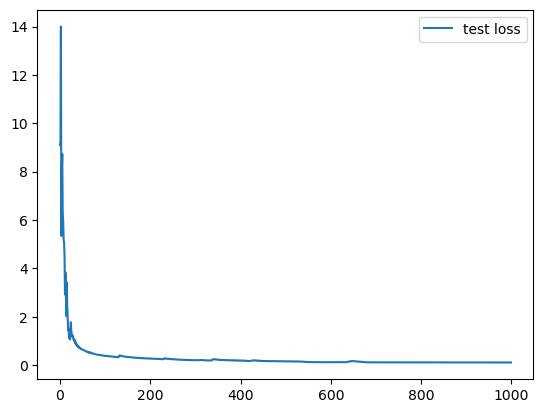

In [28]:
# plot loss
s = loss_dict[60000]
plt.plot(s['test_loss'], label='test loss')
plt.legend()

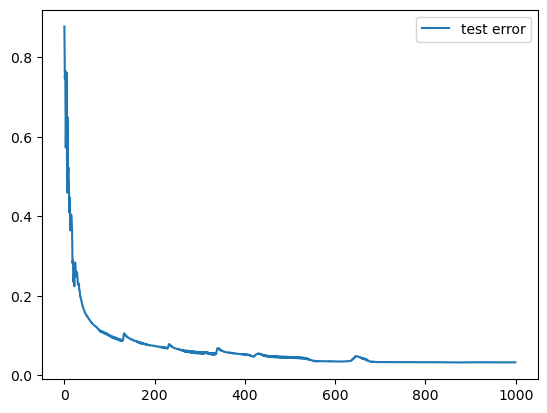

In [29]:
# plot train & test errors
s = loss_dict[60000]
plt.plot(s['test_error'], label='test error')
plt.legend()

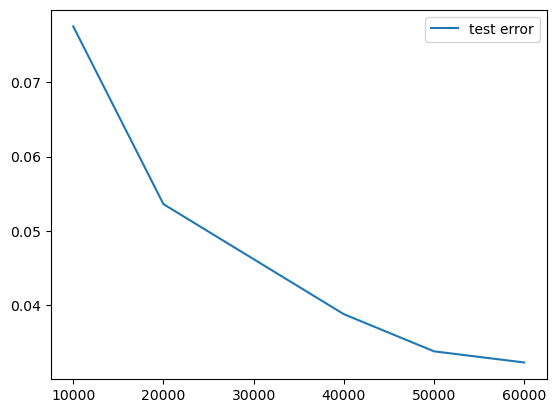

In [30]:
# learning curve
example_sizes = [10000, 20000, 30000, 40000, 50000, 60000]
test_errors = [loss_dict[example_size]['test_error'][-1] for example_size in example_sizes]

plt.plot(example_sizes, test_errors, label='test error')
plt.legend()


# 4.2

In [3]:
# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
def load_data_torch(example_size=60000):

    df_train = pd.read_csv("mnist/mnist_train.csv").sample(example_size, random_state=666)
    df_test = pd.read_csv("mnist/mnist_test.csv")

    x_train = torch.Tensor(df_train.iloc[:, 1:].values / 255).float()
    y_train = torch.Tensor(df_train.iloc[:, 0].values).long()

    x_test = torch.Tensor(df_test.iloc[:, 1:].values / 255).float()
    y_test = torch.Tensor(df_test.iloc[:, 0].values).long()

    return x_train, y_train, x_test, y_test

In [5]:
def weights_init(m, method='zeros'):
    if isinstance(m, nn.Linear):
        if method == 'zeros':
            nn.init.zeros_(m.weight)
        elif method == 'random':
            nn.init.uniform_(m.weight, -1, 1)

In [6]:
# build a model

d = 784  # number of input features
d1 = 300  # number of neurons in the hidden layer
k = 10  # number of output classes

class MNISTmodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(d, d1, bias=False)
        self.layer2 = nn.Linear(d1, k, bias=False)
        self.sigmoid = nn.Sigmoid()
        
        # Apply weight initialization
        self.apply(lambda m: weights_init(m, 'random'))
        
    def forward(self, x):
        x = self.layer1(x)
        x = self.sigmoid(x)
        x = self.layer2(x)
        return x
    
model = MNISTmodel().to(device)

model

MNISTmodel(
  (layer1): Linear(in_features=784, out_features=300, bias=False)
  (layer2): Linear(in_features=300, out_features=10, bias=False)
  (sigmoid): Sigmoid()
)

In [7]:
# loss function
loss_fn = nn.CrossEntropyLoss()

# get error
def get_error(y_hat, y):
    y_pred = torch.argmax(y_hat, dim=1)
    return torch.mean((y_pred != y).float())

In [16]:
epochs = 500
learning_rate = 1e-4
loss_dict = {}
batch_size = 64

# for plot learning curve
for example_size in np.arange(1, 7, 1) * 10000:
    print(f'example size = {example_size}')
    x, y, x_test, y_test = load_data_torch(example_size = example_size)
    
    #  re-initialize model's weights
    model = MNISTmodel().to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    test_losses = []
    test_errors = []

    for epoch in range(epochs):
        permutation = torch.randperm(x.size()[0])
        
        # mini-batch
        for i in range(0,x.size()[0], batch_size):
            indices = permutation[i:i+batch_size]
            batch_x, batch_y = x[indices], y[indices]
            # training
            model.train()
            optimizer.zero_grad()
            y_hat = model(batch_x)
            loss = loss_fn(y_hat, batch_y)
            
            # back propagation
            loss.backward()
            
            # update weights
            optimizer.step()
        
        # evaluate on test set
        with torch.no_grad():
            model.eval()
            y_hat_test = model(x_test)
            test_loss = loss_fn(y_hat_test, y_test)
            test_error = get_error(y_hat_test, y_test)
            
        test_losses.append(test_loss.item())
        test_errors.append(test_error)
        
        if epoch % 100 == 0:
            print(f'epoch {epoch}: test loss = {test_loss.item()}, test error = {test_error}')
            
    # update loss dict
    loss_dict[example_size] = {'test_loss': test_losses, 'test_error': test_errors}

example size = 10000
epoch 0: test loss = 4.893938064575195, test error = 0.7971000075340271
epoch 100: test loss = 0.2555617690086365, test error = 0.06989999860525131
epoch 200: test loss = 0.23829011619091034, test error = 0.05350000038743019
epoch 300: test loss = 0.2622254192829132, test error = 0.04830000177025795
epoch 400: test loss = 0.2979310154914856, test error = 0.04569999873638153
example size = 20000
epoch 0: test loss = 3.5984015464782715, test error = 0.7670000195503235
epoch 100: test loss = 0.17116063833236694, test error = 0.04670000076293945
epoch 200: test loss = 0.1775968223810196, test error = 0.03660000115633011
epoch 300: test loss = 0.21723555028438568, test error = 0.034699998795986176
epoch 400: test loss = 0.2515583336353302, test error = 0.03440000116825104
example size = 30000
epoch 0: test loss = 2.488910436630249, test error = 0.6093000173568726
epoch 100: test loss = 0.14766335487365723, test error = 0.04149999842047691
epoch 200: test loss = 0.154433

In [17]:
# save loss dict
with open('torch_loss_dict.pkl', 'wb') as f:
    pickle.dump(loss_dict, f)

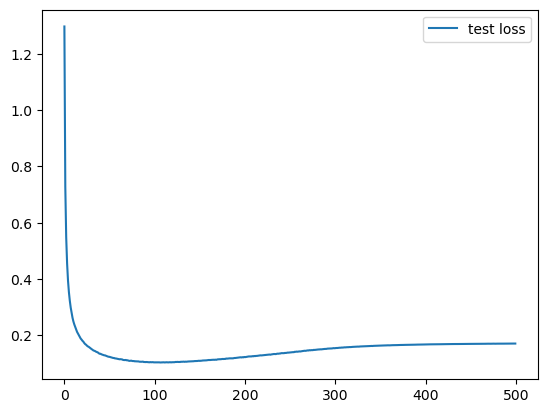

In [20]:
# plot loss
s = loss_dict[60000]
plt.plot(s['test_loss'], label='test loss')
plt.legend()
plt.show()

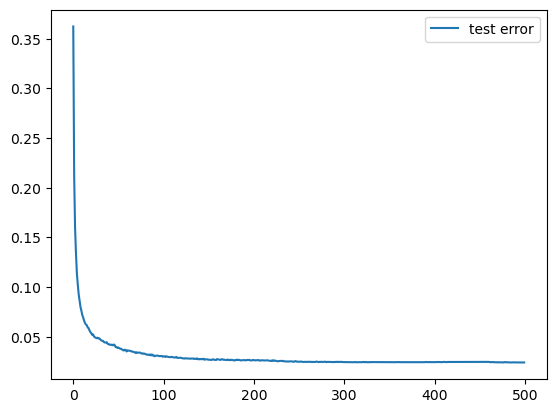

In [22]:
# plot train & test errors
s = loss_dict[60000]
plt.plot(s['test_error'], label='test error')
plt.legend()
plt.show()


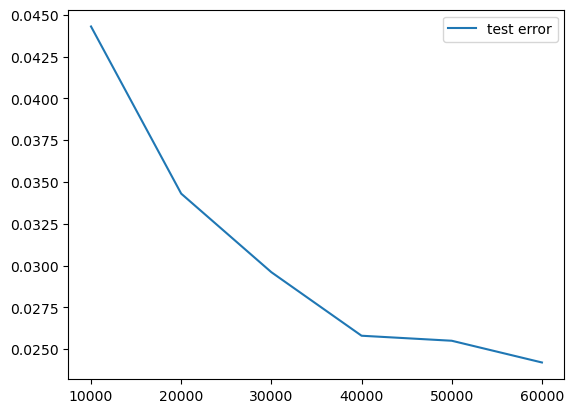

In [24]:
# learning curve
example_sizes = [10000, 20000, 30000, 40000, 50000, 60000]
test_errors = [loss_dict[example_size]['test_error'][-1] for example_size in example_sizes]

plt.plot(example_sizes, test_errors, label='test error')
plt.legend()

# 4.4

In [93]:
# activation function
def sigmoid(x):
    # Clip values for stability
    x = np.clip(x, -500, 500)
    return 1 / (1 + np.exp(-x))

def softmax(x):
    # subtract max to prevent overflow
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x), axis=0)


# forward propagation
def forward_propagation(x, w1, w2):
    z1 = np.dot(w1, x)  # first layer output before activation
    a1 = sigmoid(z1)  # second layer input
    z2 = np.dot(w2, a1)  # second layer output before activation
    y_hat = softmax(z2)  # output
    return z1, a1, z2, y_hat


# cross entropy loss
def cross_entropy_loss(y_one_hot, y_hat):
    epsilon = 1e-15 # Avoid log(0)
    y_hat_clipped = np.clip(
        y_hat, epsilon, 1 - epsilon
    )  # Ensure values are within [epsilon, 1-epsilon]
    return -np.sum(y_one_hot * np.log(y_hat_clipped)) / y_one_hot.shape[1]


# one-hot encoding; y: (n, ), y_one_hot: (k, n)
def one_hot_encoding(y, k):
    y_one_hot = np.zeros((k, y.shape[0]))
    for i in range(y.shape[0]):
        y_one_hot[y[i], i] = 1
    return y_one_hot

# get error
def get_error(y_hat, y):
    y_pred = np.argmax(y_hat, axis=0)
    return np.mean(y_pred != y)

# back propagation
def back_propagation(x, y_one_hot, y_hat, a1, w2):
    grad_w2 = np.dot((y_hat - y_one_hot), a1.T)
    grad_w1 = np.dot(np.dot(w2.T, (y_hat - y_one_hot)) * a1 * (1 - a1), x.T)
    
    # clip gradient
    grad_w2 = np.clip(grad_w2, -500, 500)
    grad_w1 = np.clip(grad_w1, -500, 500)
    
    return grad_w1, grad_w2

In [94]:
# different weight initialization
def initialize_weights(d, d1, k, method='zeros'):
    np.random.seed(0)
    
    if method == 'zeros':
        w1 = np.zeros((d1, d))
        w2 = np.zeros((k, d1))
    elif method == 'random':
        w1 = np.random.uniform(-1, 1, (d1, d))
        w2 = np.random.uniform(-1, 1, (k, d1))
        
    return w1, w2

In [95]:
def load_data(example_size=60000, weight_init='zeros'):

    # read dataset
    df_train = pd.read_csv("mnist/mnist_train.csv").sample(example_size, random_state=666)
    df_test = pd.read_csv("mnist/mnist_test.csv")

    # build neural network
    d = df_train.shape[1] - 1
    d1 = 300  # number of neurons in the hidden layer
    k = df_train["label"].nunique()  # number of output classes

    # initalize weight
    w1, w2 = initialize_weights(d, d1, k, weight_init)

    # input
    x = df_train.iloc[:, 1:].to_numpy().reshape(-1, d).T
    # normalize
    x = x / 255

    # output
    y = df_train.iloc[:, 0].to_numpy()
    y_one_hot = one_hot_encoding(y, k)

    # test input
    x_test = df_test.iloc[:, 1:].to_numpy().reshape(-1, d).T
    # normalize
    x_test = x_test / 255

    # test output
    y_test = df_test.iloc[:, 0].to_numpy()
    y_test_one_hot = one_hot_encoding(y_test, k)
    
    return x, y, y_one_hot, x_test, y_test, y_test_one_hot, w1, w2, k

In [96]:
learning_rate = 1e-4
max_iter = 1000

loss_dict = {}

# for plot learning curve
for example_size in np.arange(1, 7, 1) * 10000:
    print(f'example size = {example_size}')
    
    train_losses = []
    test_losses = []
    train_errors = []
    test_errors = []

    # random initialization
    x, y, y_one_hot, x_test, y_test, y_test_one_hot, w1, w2, k = load_data(example_size = example_size, weight_init='zeros')

    for iter in range(max_iter):
        # (100, 60000) (100, 60000) (10, 60000) (10, 60000)
        z1, a1, z2, y_hat = forward_propagation(x, w1, w2)
        
        # compute cross entropy loss
        loss = cross_entropy_loss(y_one_hot, y_hat)
        train_error = get_error(y_hat, y)
        # evaluate on test set
        _, _, _, y_hat_test = forward_propagation(x_test, w1, w2)
        test_loss = cross_entropy_loss(y_test_one_hot, y_hat_test)
        test_error = get_error(y_hat_test, y_test)
        train_losses.append(loss)
        test_losses.append(test_loss)
        train_errors.append(train_error)
        test_errors.append(test_error)
        
        if iter % 100 == 0:
            print(f'iter {iter}: train loss = {loss}, test loss = {test_loss}, train error={train_error}, test error = {test_error}')

        # compute gradient
        grad_w1, grad_w2 = back_propagation(x, y_one_hot, y_hat, a1, w2)
        
        # update weights
        w2 -= learning_rate * grad_w2
        w1 -= learning_rate * grad_w1
        
    # update loss dict
    loss_dict[example_size] = {'train_loss': train_losses, 'test_loss': test_losses, 'train_error': train_errors, 'test_error': test_errors}

example size = 10000
iter 0: train loss = 2.3025850929940455, test loss = 2.3025850929940455, train error=0.9026, test error = 0.902
iter 100: train loss = 2.27656171934802, test loss = 2.2732952032153717, train error=0.8889, test error = 0.8865
iter 200: train loss = 2.2438483801782714, test loss = 2.2376627124068724, train error=0.8889, test error = 0.8865
iter 300: train loss = 2.202552411553739, test loss = 2.1938012941324896, train error=0.8889, test error = 0.8865
iter 400: train loss = 2.1686813657153223, test loss = 2.158510784141317, train error=0.8889, test error = 0.8865
iter 500: train loss = 2.1448829039475377, test loss = 2.134035790706657, train error=0.8889, test error = 0.8865
iter 600: train loss = 2.1281359014119063, test loss = 2.116945306293821, train error=0.8889, test error = 0.8865
iter 700: train loss = 2.115855171373785, test loss = 2.104474636045558, train error=0.8889, test error = 0.8865
iter 800: train loss = 2.1064475719679363, test loss = 2.0949564453522

In [97]:
# save loss dict
with open('numpy_loss_dict_zero_weight.pkl', 'wb') as f:
    pickle.dump(loss_dict, f)

In [31]:
# read
with open('numpy_loss_dict_zero_weight.pkl', 'rb') as f:
    loss_dict = pickle.load(f)

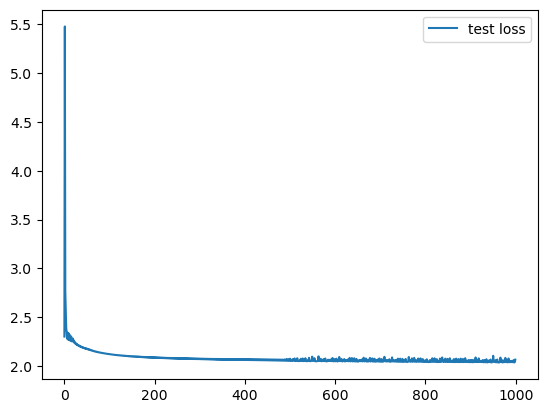

In [32]:
# plot loss
s = loss_dict[60000]
plt.plot(s['test_loss'], label='test loss')
plt.legend()

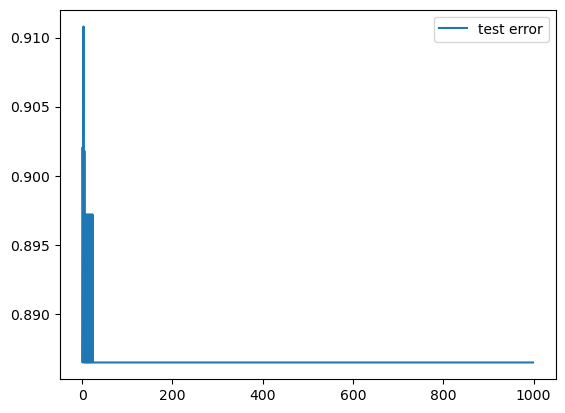

In [33]:
# plot train & test errors
s = loss_dict[60000]
plt.plot(s['test_error'], label='test error')
plt.legend()

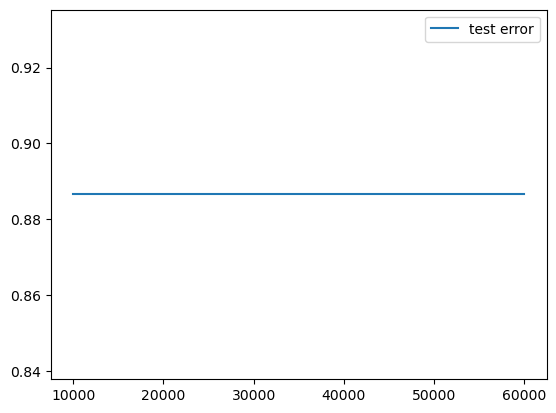

In [34]:
# learning curve
example_sizes = [10000, 20000, 30000, 40000, 50000, 60000]
test_errors = [loss_dict[example_size]['test_error'][-1] for example_size in example_sizes]

plt.plot(example_sizes, test_errors, label='test error')
plt.legend()
